In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv("./encoded_bin_df.csv")
df.head()

,outcome_type,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,0,1,35,33,326,106,2,5,1,1,5,5,80,1.113889
1,0,1,35,33,326,106,2,5,1,1,3,3,89,1.259722
2,0,1,33,36,124,166,1,5,1,1,6,6,120,4.970139
3,0,1,12,33,309,166,2,3,1,1,2,2,193,0.119444
4,0,0,2,33,217,120,3,0,2,2,2,2,185,0.870833


In [3]:
X, y = df.iloc[:,1:], df.iloc[:,0]

In [4]:
df_dmatrix = xgb.DMatrix(data=X, label=y)

/Users/suprajasharma/anaconda3/envs/PythonData/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/suprajasharma/anaconda3/envs/PythonData/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = .3, learning_rate = .1,
                         max_depth = 10, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train, y_train)

predictions = xg_reg.predict(X_test)

[10:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %f' %(rmse))

RMSE: 0.431634


In [9]:
params = {"objective": "reg:linear", "colsample_bytree": 0.3, "learning_rate": 0.1,
         "max_depth": 5, "alpha": 10}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
                   num_boost_round=50, early_stopping_rounds=10,
                   metrics="rmse", as_pandas=True, seed=123)

[10:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.369327
Name: test-rmse-mean, dtype: float64


In [11]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
#plt.savefig('xgb_bin_tree.png')

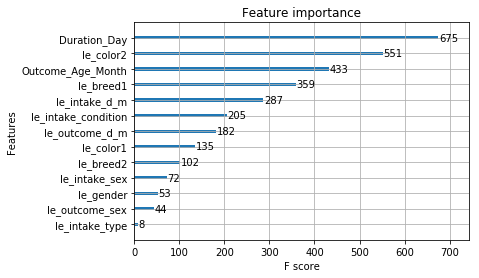

In [12]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 10})
plt.savefig('xgb_bin_featimp.png')

In [13]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [15]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [16]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.22%


In [17]:
from numpy import loadtxt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [18]:
kfold =StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 83.53% (0.43%)


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_pred = model.fit(X_train, y_train).predict(X_train)

In [21]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [22]:
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[20205,  5466],
       [ 2310, 19699]])

In [23]:
import seaborn as sns

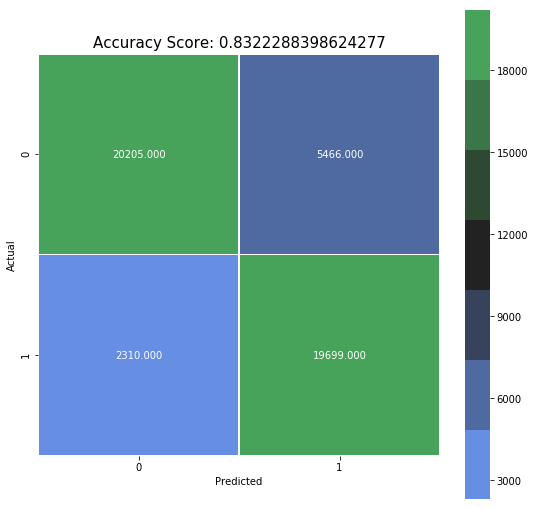

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = (sns.diverging_palette(255, 133, l=60, n=7, center="dark")));
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.savefig('cm_xgb_bin.png')